#Bar Graph

##Plotly

In [1]:
import plotly.express as px
data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(data_canada, x='year', y='pop')
fig.show()

##Seaborn

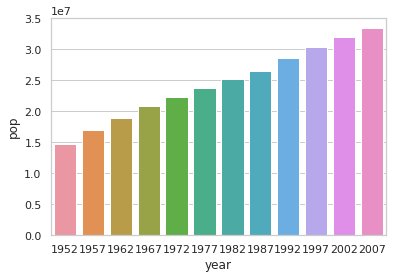

In [2]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="year", y="pop", data=data_canada)

#Grouped Bar Graph

##Plotly

In [3]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(df, x="sex", y="total_bill", color="time")
fig.show()

##Seaborn

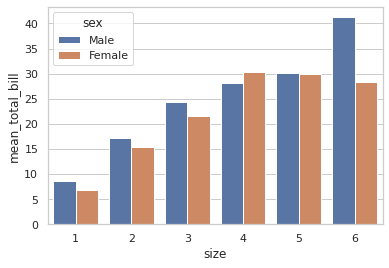

In [4]:
import seaborn as sb
df = sb.load_dataset('tips')
df = df.groupby(['size', 'sex']).agg(mean_total_bill=("total_bill", 'mean'))
df = df.reset_index()
sb.barplot(x="size", y="mean_total_bill", hue="sex", data=df)

#Stacked Bar Graph

##plotly

In [5]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(df, x="sex", y="total_bill", color='time')
fig.show()

##Seaborn

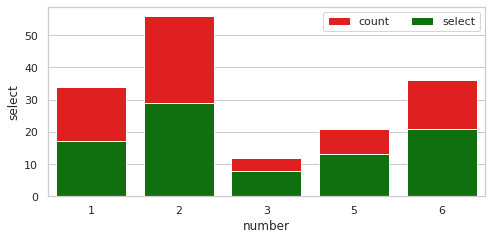

In [6]:
import pandas
import matplotlib.pylab as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
df = pandas.DataFrame(dict(
   number=[2, 5, 1, 6, 3],
   count=[56, 21, 34, 36, 12],
   select=[29, 13, 17, 21, 8]
))
bar_plot1 = sns.barplot(x='number', y='count', data=df, label="count", color="red")
bar_plot2 = sns.barplot(x='number', y='select', data=df, label="select", color="green")
plt.legend(ncol=2, loc="upper right", frameon=True)
plt.show()

#Segmented Bar Graph

This is the type of stacked bar graph where each stacked bar shows the percentage of its discrete value from the total value. The total percentage is 100%.

##plotly

In [8]:
import plotly.graph_objects as go
import numpy as np

labels = ["apples","oranges","pears","bananas"]
widths = np.array([10,20,20,50])

data = {
    "South": [50,80,60,70],
    "North": [50,20,40,30]
}

fig = go.Figure()
for key in data:
    fig.add_trace(go.Bar(
        name=key,
        y=data[key],
        x=np.cumsum(widths)-widths,
        width=widths,
        offset=0,
        customdata=np.transpose([labels, widths*data[key]]),
        texttemplate="%{y} x %{width} =<br>%{customdata[1]}",
        textposition="inside",
        textangle=0,
        textfont_color="white",
        hovertemplate="<br>".join([
            "label: %{customdata[0]}",
            "width: %{width}",
            "height: %{y}",
            "area: %{customdata[1]}",
        ])
    ))

fig.update_xaxes(
    tickvals=np.cumsum(widths)-widths/2,
    ticktext= ["%s<br>%d" % (l, w) for l, w in zip(labels, widths)]
)

fig.update_xaxes(range=[0,100])
fig.update_yaxes(range=[0,100])

fig.update_layout(
    title_text="Marimekko Chart",
    barmode="stack",
    uniformtext=dict(mode="hide", minsize=10),
)

##Seaborn

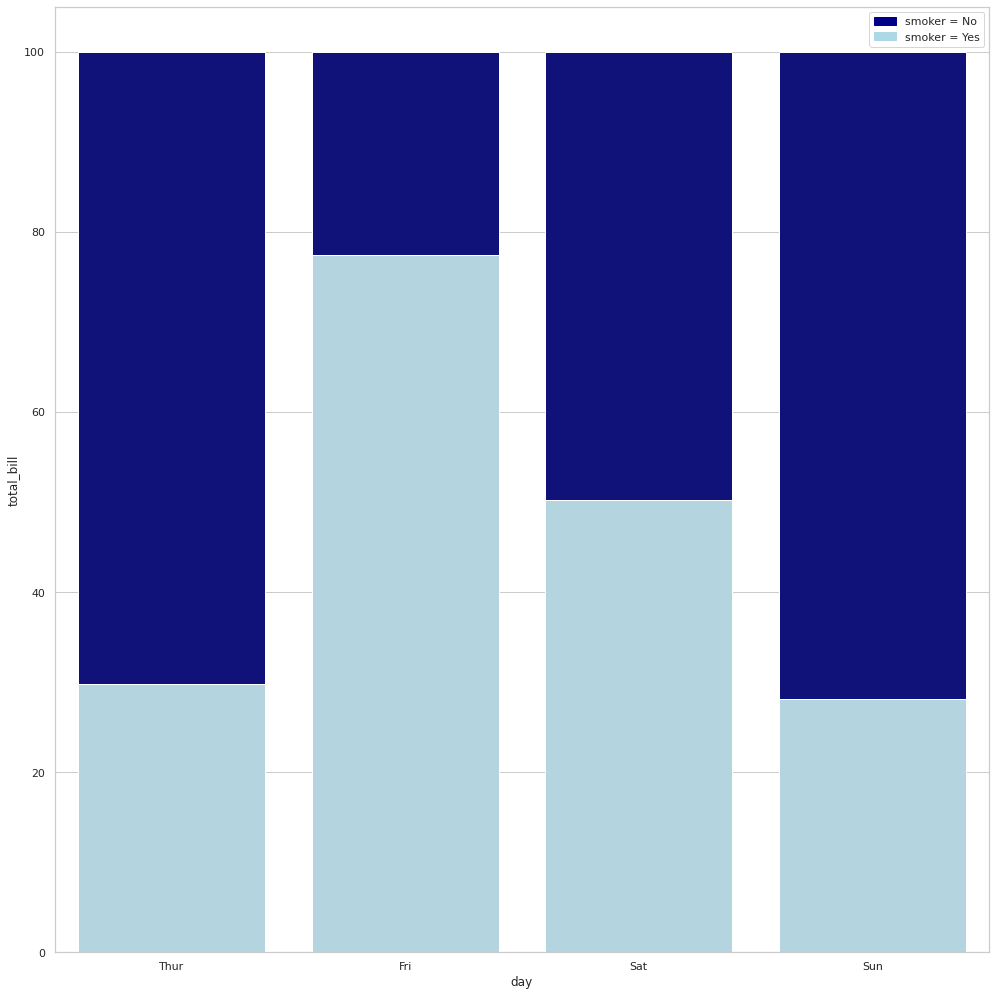

In [7]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# load dataset
tips = sns.load_dataset("tips")

# set the figure size
plt.figure(figsize=(14, 14))

# from raw value to percentage
total = tips.groupby('day')['total_bill'].sum().reset_index()
smoker = tips[tips.smoker=='Yes'].groupby('day')['total_bill'].sum().reset_index()
smoker['total_bill'] = [i / j * 100 for i,j in zip(smoker['total_bill'], total['total_bill'])]
total['total_bill'] = [i / j * 100 for i,j in zip(total['total_bill'], total['total_bill'])]

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="day", y="total_bill", data=smoker, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

#Line Graph

##plotly

In [9]:
import plotly.express as px
df = px.data.gapminder().query("country=='Canada'")
fig = px.line(df, x="year", y="lifeExp", title='Life expectancy in Canada')
fig.show()

##seaborn

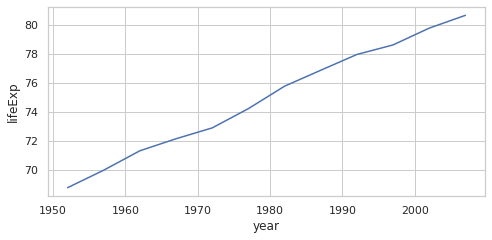

In [10]:
import seaborn as sns
sns.lineplot(data=df, x="year", y="lifeExp")

#Multiple Line Graph

##plotly

In [11]:
import plotly.express as px
df = px.data.gapminder().query("continent == 'Oceania'")
fig = px.line(df, x='year', y='lifeExp', color='country', symbol="country")
fig.show()

##seaborn

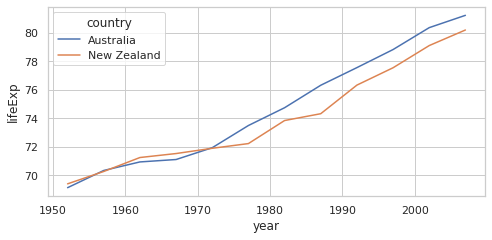

In [12]:
import seaborn as sns
sns.lineplot(data=df, x='year', y='lifeExp', hue='country')

#Pie Chart

##Plotly

In [13]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
fig = px.pie(df, values='pop', names='country', title='Population of European continent')
fig.show()

##seaborn

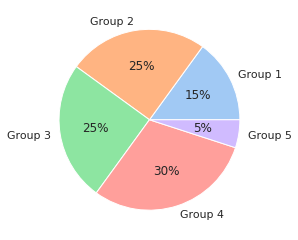

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

data = [15, 25, 25, 30, 5]
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

colors = sns.color_palette('pastel')[0:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

#Exploded Pie Chart

##Plotly

In [15]:
import plotly.graph_objects as go

labels = ['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen']
values = [4500, 2500, 1053, 500]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0.2, 0])])
fig.show()

##seaborn

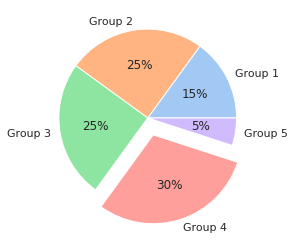

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

data = [15, 25, 25, 30, 5]
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

colors = sns.color_palette('pastel')[0:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', explode = [0, 0, 0, 0.2, 0])
plt.show()

#Donut Chart

##Plotly

In [17]:
import plotly.graph_objects as go

labels = ['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen']
values = [4500, 2500, 1053, 500]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

##seaborn

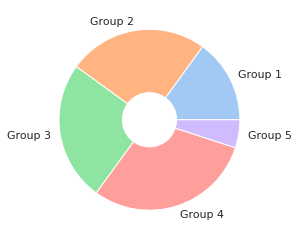

In [25]:
import numpy as np
import matplotlib.pyplot as plt
data = np.random.randint(20, 100, 6)

data = [15, 25, 25, 30, 5]
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

plt.pie(data, labels = labels, colors = colors)
circle = plt.Circle( (0,0), 0.3, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

#Histogram

##Plotly

In [26]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df, x="total_bill")
fig.show()

##seaborn

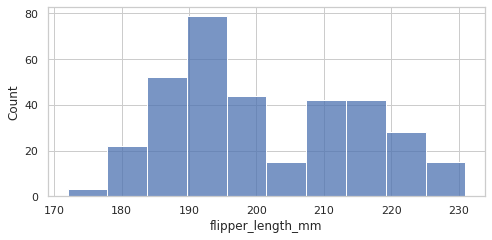

In [27]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm")

#3-D Area Chart

##Plotly

In [30]:
import plotly.express as px
df = px.data.gapminder()
fig = px.area(df, x="year", y="pop", color="continent",
	      line_group="country")
fig.show()

##seaborn

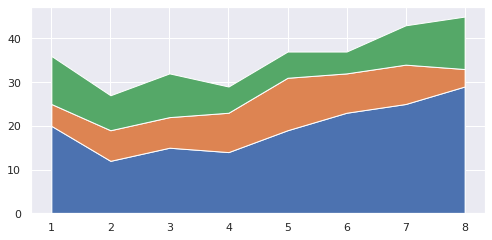

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
 
df = pd.DataFrame({'period': [1, 2, 3, 4, 5, 6, 7, 8],
                   'team_A': [20, 12, 15, 14, 19, 23, 25, 29],
                   'team_B': [5, 7, 7, 9, 12, 9, 9, 4],
                   'team_C': [11, 8, 10, 6, 6, 5, 9, 12]})

plt.stackplot(df.period, df.team_A, df.team_B, df.team_C)

#Dot Graph

##Plotly

In [32]:
import plotly.express as px
df = px.data.medals_long()

fig = px.scatter(df, y="nation", x="count", color="medal", symbol="medal")
fig.update_traces(marker_size=10)
fig.show()

##seaborn

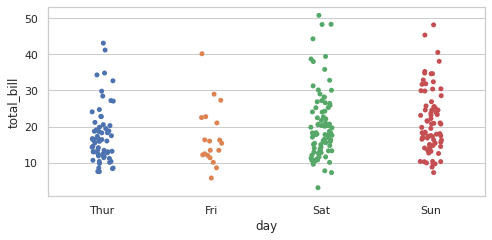

In [39]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.stripplot(x="day", y="total_bill", data=tips)

#Scatter Plot

##Plotly

In [40]:
import plotly.express as px
df = px.data.iris() # iris is a pandas DataFrame
fig = px.scatter(df, x="sepal_width", y="sepal_length")
fig.show()

##seaborn

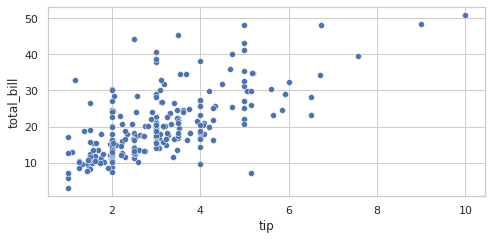

In [38]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.scatterplot(x="tip", y="total_bill", data=tips)

#Bubble Chart

##plotly

In [41]:
import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp",
         size="pop", color="continent",
                 hover_name="country", log_x=True, size_max=60)
fig.show()

##seaborn

In [43]:
!pip install gapminder

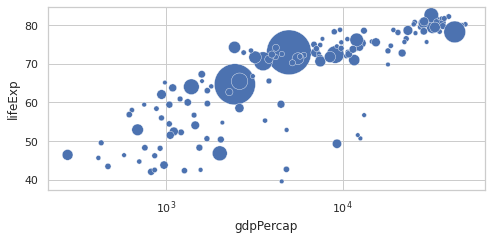

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from gapminder import gapminder # import data set 

data = gapminder.loc[gapminder.year == 2007]
 
b = sns.scatterplot(data=data, x="gdpPercap", y="lifeExp", size="pop", legend=False, sizes=(20, 2000))

b.set(xscale="log")

plt.show()

#Radar Chart

##plotly

In [45]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=[1, 5, 2, 2, 3],
    theta=['processing cost','mechanical properties','chemical stability',
           'thermal stability', 'device integration']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.show()

##seaborn

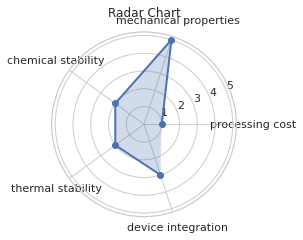

In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
stats=np.array([1, 5, 2, 2, 3])
labels=['processing cost','mechanical properties','chemical stability',
           'thermal stability', 'device integration']
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title("Radar Chart")
ax.grid(True)

#Box Plot

##plotly

In [47]:
import numpy as np 
import plotly.express as px
data = np.array([-40,1,2,5,10,13,15,16,17,40])
fig = px.box(data, points="all")
fig.show()

##seaborn

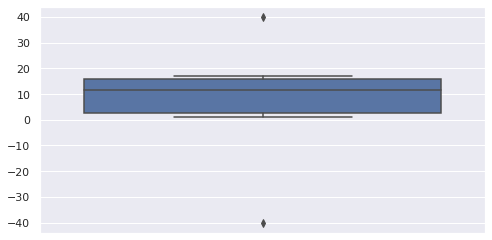

In [48]:
import seaborn as sns
sns.set_style( 'darkgrid' )
fig = sns.boxplot(y=data)